<a href="https://colab.research.google.com/github/junieberry/ML-PerfectGuide/blob/main/07.%20%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81/03%20Mean%20shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mean Shift
- Kmean과 비슷하게 중심을 이동하면서 군집화
- Kmean은 중심에 소속된 데이터의 평균 거리 중심으로 이동
- Mean Shift는 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동
- 데이터 분포 확률 밀도가 가장 높은 곳으로 이동
- KDE(kernel density estimation)사용

---
1. 관측된 데이터에 커널 함수 적용하고 평균 내서 확률 밀도 함수 추정
2. 확률 밀도 함수 PDF는 확률 변수의 분포를 나타내는 분포
    <img src="https://1911395421-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LxaqUhwPNPE0iJCKfjJ%2F-MZY4Pj4jh3vqBHJ4maw%2F-MZY8aRVrzN-g-i-W2pF%2Fimage.png?alt=media&token=92f70b1c-99d6-40e8-a6dc-e5f2a03c2dcf" width=70%>
3. h를 사용해서 KDE 상태 조절
    - h가 작으면 좁고 뾰족한 KDE로 overfitting
    - h가 크면 평탄한 KDE로 underfitting
4. 클러스터링 개수 말고 bandwidth로 설정

---

- 데이터 셋이나 모델 형태를 가정하지 않아 유연한 군집화 가능
- 이상치의 영향이 크기 않음
- 군집의 개수를 정할 필요가 없음
- 알고리즘 수행 시간이 오래 걸림
- bandwidth 크기에 따른 군집화 영향도가 큼

In [1]:
## 데이터 생성
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

x, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

In [2]:
## bandwidth 0.9
meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


In [4]:
## bandwidth 1
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


**bandwidth 최적화**

In [6]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(x)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 2.002


In [7]:
## bandwidth 2.002
meanshift= MeanShift(bandwidth=2.002)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1]


In [9]:
import pandas as pd


clusterDF = pd.DataFrame(data=x, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(x)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1]


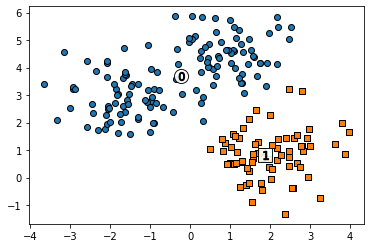

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()

In [12]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  65
        1                   2
1       1                  67
2       0                  66
Name: meanshift_label, dtype: int64
